# SVM using RBF Kernel on  Amazon Finefood Reviews.

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.

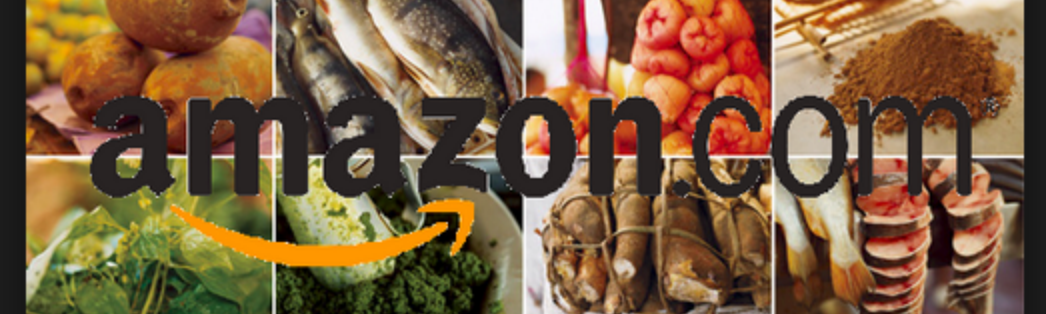

Number of reviews: 568,454
Number of users: 256,059
Number of products: 74,258
Timespan: Oct 1999 - Oct 2012
Number of Attributes/Columns in data: 10

Attribute Information:

    Id
    ProductId - unique identifier for the product
    UserId - unqiue identifier for the user
    ProfileName
    HelpfulnessNumerator - number of users who found the review helpful
    HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
    Score - rating between 1 and 5
    Time - timestamp for the review
    Summary - brief summary of the review
    Text - text of the review

Objective:

Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).

## Summary

    1. Applied svm on Amazon Fine Foods Text Reviews.
    2. Used different text proecssing techniques like Bag of Words, Tf-Idf, Average Word to Vector and Tf-Idf weighted 
       Word to Vector.
    3. Used Gird Search and Random Search technique to find the optimal parameters for Logistic Regression.
    4. Used F1 as scoring metric since the data is imbalanced.
    5. Evaluated the test data on various performance metrics like accuracy, f1-score, precision, recall.
    6. Obtained the Top 10 Positive and Negative words.

## Objective 

 To determinne the polarity of a Text Review. 
    

In [1]:
#Importing all the necessary packages.
import sqlite3
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Now accesing the database where we have cleaned text. Cleaned Text means, the transformed text which has been Lemmatized, 
#Stemmed,etc. 
conn = sqlite3.connect('C:/Users/Swaroop/Desktop/Srikanth Reddy/final1.sqlite')
final = pd.read_sql_query("""
SELECT *
FROM Reviews
""", conn)

In [3]:
#Converting the Unix time stamp to human readable form.
final['Time']=(pd.to_datetime(final['Time'],unit='ms')) 

In [4]:
#Here we can see that we have almost3.65lakh reviews.
final.shape

(364171, 12)

In [5]:
# Sorting the reviews accoring to Time stamp in ascending order so that old reviews remain in train and the latest reviews in test.
final2=final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [6]:
# Checking the size of data
(final2).shape

(364171, 12)

In [7]:
# In this step i have taken 30k datapoints.
final2=final2[0:30000]

##### Since RBF is computationally more complex, we will take very few features for faster execution.The code will never execute in a normal PC if we take all the features. Inorder to do so, we will take only few samples(10/20/30k) reviews.

In [8]:
# Checking if data is imbalanced.
final2['Score'].value_counts()

positive    26761
negative     3239
Name: Score, dtype: int64

In [9]:
#Importing all the necessary packages for performing Knn.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,f1_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Part I
# ============================== Data Preprocessing ===========================================
#Here we will be performing Logistic Regression on only reviews, thats why we take only CleanedText column in X.
#In variable 'y', we keep only Scores(positive,negative) for a the corresponding reviews. 
X = final2.CleanedText.values # end index is exclusive
y = final2.Score.values # showing you two ways of indexing a pandas df
X.shape # We can see that there are 3.6 lakh reviews(rows)

(30000,)

In [11]:
# Splitting the data in train and test where we have 80% od data in Train and rest in Test.
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

## SVM using RBF Kernel using SVC Classifier on Bag of Words 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,2),max_features=800) 
bow_svm_train = count_vect.fit_transform(X_train) # Here we fit transform the data

bow_svm_train.get_shape()# obtaining the shape

(24000, 800)

###### Here, instead of taking all the features, we will restrict our features with 800 since RBF kernel could take lot of time for execution.

In [13]:
# Standardization of Data. This step is importand because sometimes the feature values could be in different scales. So standardization could solve scaling problem.
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

bow_svm_train=StandardScaler(with_mean=False).fit_transform(bow_svm_train)
bow_svm_train

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<24000x800 sparse matrix of type '<class 'numpy.float64'>'
	with 536825 stored elements in Compressed Sparse Row format>

In [14]:
bow_svm_test=count_vect.transform(X_test) # Transforming the test data.
bow_svm_test.get_shape()

(6000, 800)

In [15]:
bow_svm_test=StandardScaler(with_mean=False).fit_transform(bow_svm_test)
bow_svm_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<6000x800 sparse matrix of type '<class 'numpy.float64'>'
	with 134196 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC

##### Using RandomizedSearchCV for finding the optimal parameters.

###### Taking 30K reviews with 800 features and applying Randomized Search techniques for optimal parameters.

In [39]:
# It is very important to find the optimal parameters before applying any algorithm on the data.
def tuning(y_train,y_test,x_train,x_test): # Defining a function
    lb = LabelBinarizer() 
    y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
    y_test= np.array([number[0] for number in lb.fit_transform(y_test)])


    svm_rbf =SVC(kernel='rbf',class_weight='balanced') # class_weight is set to 'balanced' because data is imbalanced. We can also give a dict of values if we want.

    param = {'C':[0.0001,0.001,0.05,0.03,0.01,0.5,0.3,0.1,1,3,5,7,10,15,17,20], # List of 'alpha' values. 
             'gamma':[0.0005,0.0001,0.005,0.001,0.05,0.01,0.5,0.3,0.1]} # the regularization terms.
    grid_svm_rbf = RandomizedSearchCV(svm_rbf,param,cv=5,verbose=1,scoring= 'f1_weighted',n_jobs=-1) # Since all data is imbalanced, accuracy can't be used as scoring metric, so we can use metrics like precision, recall, f1 or roc_auc.
    grid_svm_rbf.fit(x_train,y_train)
    print("Best HyperParameter: ",grid_svm_rbf.best_params_) # We get the best C and penality.
    print("Accuracy Obtained: %.2f%%"%(grid_svm_rbf.best_score_*100))

In [19]:
%%time
#2k features
tuning(y_train,y_test,bow_svm_train,bow_svm_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 26.1min finished


Best HyperParameter:  {'gamma': 0.005, 'C': 3}
Accuracy Obtained: 87.51%
Wall time: 30min 1s


Accuracy on test set: 90.117%
Precision on test set: 0.908
Recall on test set: 0.990
F1-Score on test set: 0.947


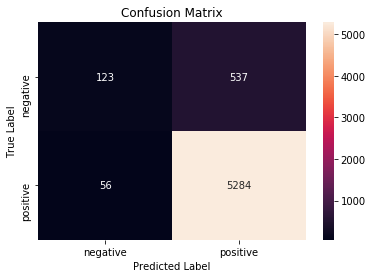

Wall time: 4min 7s


In [20]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C= 3,gamma=0.005,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(bow_svm_train,y_train)
pred = clf.predict(bow_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### Even after running RandomziedSearch CV for multiple times for new parameters, we did not get good parameters for the model that keeps the TPR nand TNR high.

#### Now lets try with GridSearchCV to find the optimal parameters.

In [25]:
# It is very important to find the optimal parameters before applying any algorithm on the data.
def tuning(y_train,y_test,x_train,x_test): # Defining a function
    lb = LabelBinarizer() 
    y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
    y_test= np.array([number[0] for number in lb.fit_transform(y_test)])


    svm_rbf =SVC(kernel='rbf',class_weight='balanced') # class_weight is set to 'balanced' because data is imbalanced. We can also give a dict of values if we want.

    param = {'C':[0.0001,0.001,0.05,0.03,0.01,0.5,0.3,0.1,1,3,5,7,10,15,17,20], # List of 'alpha' values. 
             'gamma':[0.0005,0.0001,0.005,0.001,0.05,0.01,0.5,0.3,0.1]} # the regularization terms.
    grid_svm_rbf = GridSearchCV(svm_rbf,param,cv=5,verbose=1,scoring= 'f1',n_jobs=-1) # Since all data is imbalanced, accuracy can't be used as scoring metric, so we can use metrics like precision, recall, f1 or roc_auc.
    grid_svm_rbf.fit(x_train,y_train)
    print("Best HyperParameter: ",grid_svm_rbf.best_params_) # We get the best C and penality.
    print("Accuracy Obtained: %.2f%%"%(grid_svm_rbf.best_score_*100))

In [57]:
%%time
# Calling the function
tuning(y_train,y_test,bow_svm_train,bow_svm_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 68.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 177.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 355.7min finished


Best HyperParameter:  {'C': 20, 'gamma': 0.001}
Accuracy Obtained: 95.06%
Wall time: 5h 57min 38s


###### Here we can see that the fuction took almost 6 hours to execute since we used Grid Search CV(considers all the possible options for tuning unlike random search) for 30k points. So for next vectorizers(TFIDF,AVGW2V and TFIDF-W2V) we will take only 5-10k reviews for fast execution.

Accuracy on test set: 91.400%
Precision on test set: 0.942
Recall on test set: 0.962
F1-Score on test set: 0.952


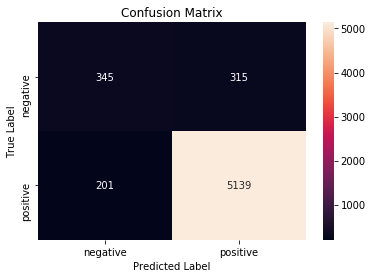

Wall time: 2min


In [17]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C= 20,gamma=0.001,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(bow_svm_train,y_train)
pred = clf.predict(bow_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### It can be observed that the TPR and TNR is comparetively higher when used GridSearch CV in this case.

### SVM using RBF Kernel on Tf-Idf Vectorizer. 

In [53]:
final2=final2[0:10000]
final2.shape

(10000, 12)

In [54]:
X = final2.CleanedText.values # end index is exclusive
y = final2.Score.values # showing you two ways of indexing a pandas df
X.shape

(10000,)

In [55]:
# Splitting the data in train and test where we have 80% od data in Train and rest in Test.
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_svm_train = vect.fit_transform(X_train)
tfidf_svm_train.shape

(8000, 193863)

In [49]:
# Standardization of Data. This step is importand because sometimes the feature values could be in different scales. So standardization could solve scaling problem.
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

tfidf_svm_train=StandardScaler(with_mean=False).fit_transform(tfidf_svm_train)
tfidf_svm_train

<8000x193863 sparse matrix of type '<class 'numpy.float64'>'
	with 547608 stored elements in Compressed Sparse Row format>

In [50]:
tfidf_svm_test=vect.transform(X_test)
tfidf_svm_test.get_shape()

(2000, 193863)

In [51]:
tfidf_svm_test=StandardScaler(with_mean=False).fit_transform(tfidf_svm_test)
tfidf_svm_test

<2000x193863 sparse matrix of type '<class 'numpy.float64'>'
	with 98611 stored elements in Compressed Sparse Row format>

###### Using Grid Search for finding optimal parameters.

In [52]:
%%time
tuning(y_train,y_test,tfidf_svm_train,tfidf_svm_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 53.5min finished


Best HyperParameter:  {'C': 0.5, 'gamma': 0.0005}
Accuracy Obtained: 94.20%
Wall time: 54min 29s


Accuracy on test set: 87.450%
Precision on test set: 0.875
Recall on test set: 1.000
F1-Score on test set: 0.933


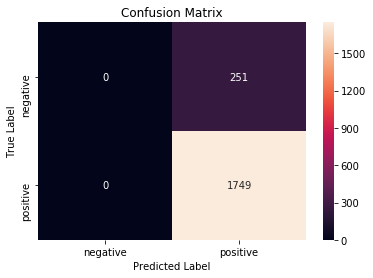

Wall time: 1min 8s


In [57]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C=0.5,gamma=0.0005,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(tfidf_svm_train,y_train)
pred = clf.predict(tfidf_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### Using RandomSearch CV

In [59]:
%%time
tuning(y_train,y_test,tfidf_svm_train,tfidf_svm_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.3min finished


Best HyperParameter:  {'gamma': 0.001, 'C': 0.5}
Accuracy Obtained: 83.92%
Wall time: 5min 24s


Accuracy on test set: 87.450%
Precision on test set: 0.875
Recall on test set: 1.000
F1-Score on test set: 0.933


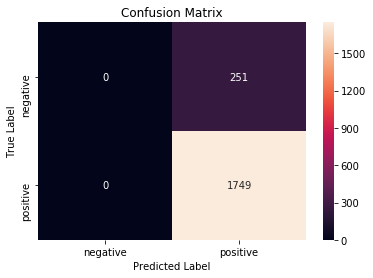

Wall time: 1min 7s


In [60]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C=0.5,gamma=0.001,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(tfidf_svm_train,y_train)
pred = clf.predict(tfidf_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Observations
It can be seen that RBF Kernel didn't work well on Tf-idf with 10k points. 

### RBF Kernel on Average Word to Vector

In [15]:
final2=final2[0:10000]

In [16]:
X = final2.CleanedText.values # end index is exclusive
y = final2.Score.values 

In [17]:
# Splitting the data in train and test where we have 80% od data in Train and rest in Test.
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import gensim

# We are suppose to find a list of list where each list is a sentence and we use this list to train W2V.
#Since our X_train is a numpy multimentional array having sentence in bytes, we have to convert the byte 
#objects and convert to string.
# In this way we create list of list using X_train and we will train W2V using it.
list_of_train=[]
for i in X_train:
    decode=i.decode('utf-8')#Since the data in X_train is of byte type, we convert it into string.
    text =decode.split()    # Now we create a list of sentence 
    list_of_train.append(text)# Here we append everything so that we get a list 
print(list_of_train)           #of list where each list is sentence.

list_of_test=[]
for i in X_test:
    decode=i.decode('utf-8')
    text =decode.split() 
    list_of_test.append(text)
print(list_of_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [19]:
#We train our W2V model only using X_train list and try to find 
#avgW2V for train, test and cv datasets.
w2v_model=gensim.models.Word2Vec(list_of_train,min_count=5,size=50, workers=6)
w2v_words = list(w2v_model.wv.vocab)

In [20]:
from sklearn.preprocessing import StandardScaler

# compute average word2vec for each review for X_train .
train_vectors = []; 
for sent in list_of_train:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: # 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
    
# compute average word2vec for each review for X_test .
test_vectors = []; 
for sent in list_of_test:
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: # 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_vectors.append(sent_vec) 

# Data-preprocessing: Standardizing the data
sc = StandardScaler()
avgw2v_svm_train = sc.fit_transform(train_vectors)
avgw2v_svm_test = sc.transform(test_vectors)

##### Random Search for optimal parameters

In [22]:
%%time
tuning(y_train,y_test,avgw2v_svm_train,avgw2v_svm_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.2s finished


Best HyperParameter:  {'gamma': 0.1, 'C': 15}
Accuracy Obtained: 86.05%
Wall time: 37.5 s


Accuracy on test set: 85.050%
Precision on test set: 0.906
Recall on test set: 0.925
F1-Score on test set: 0.915


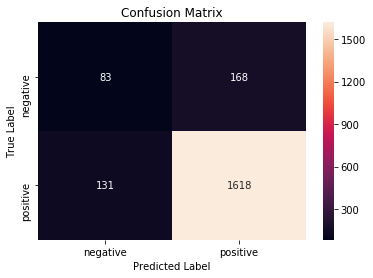

Wall time: 2.7 s


In [24]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C=15,gamma=0.1,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(avgw2v_svm_train,y_train)
pred = clf.predict(avgw2v_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###### Using Grid Search to tune the parameters

In [28]:
%%time
tuning(y_train,y_test,avgw2v_svm_train,avgw2v_svm_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  9.4min finished


Best HyperParameter:  {'C': 0.01, 'gamma': 0.0001}
Accuracy Obtained: 94.17%
Wall time: 9min 28s


Accuracy on test set: 87.450%
Precision on test set: 0.875
Recall on test set: 1.000
F1-Score on test set: 0.933


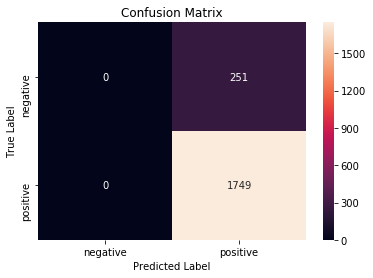

Wall time: 4.63 s


In [27]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C=0.01,gamma=0.0001,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(avgw2v_svm_train,y_train)
pred = clf.predict(avgw2v_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Using RBF Kernel on Tf-Idf Weighted W2V

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tfidf_train = tf_idf_vect.fit_transform(X_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictonary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

In [31]:
tf_idf_vect1 = TfidfVectorizer(ngram_range=(1,2))
tfidf_test = tf_idf_vect1.fit_transform(X_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictonary1 = dict(zip(tf_idf_vect1.get_feature_names(), list(tf_idf_vect1.idf_)))

In [32]:
# TF-IDF weighted Word2Vec
from tqdm import tqdm

def tfidf_w2v(x,y):
    
    tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
    # final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

    tfidf_sent_vectors = [] # the tfidf-w2v for each sentence/review is stored in this list
    row=0;
    for sent in tqdm(x): # for each review/sentence
        sent_vec = np.zeros(50) # as word vectors are of zero length
        weight_sum =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]# 50dim array is created for each word in the list of train(x).
                # obtain the tf_idfidf of a word in a sentence/review
                #tfi_df = final_tf_idf[row, tfidf_feat.index(word)]
                tf_idf = y[word]*(sent.count(word)/len(sent)) #here we get the tfidf value of the word from the list of train
                sent_vec += (vec * tf_idf)
                weight_sum += tf_idf
        if weight_sum != 0:
            sent_vec /= weight_sum
        tfidf_sent_vectors.append(sent_vec)
        row += 1
    return tfidf_sent_vectors

In [33]:
tfidfw2v_train=tfidf_w2v(list_of_train,dictonary)

100%|████████████████████████████████████████████████████████████████████████████| 8000/8000 [00:05<00:00, 1532.79it/s]


In [34]:
sc = StandardScaler()
tfidf_svm_train = sc.fit_transform(tfidfw2v_train)

In [35]:
tfidfw2v_test=tfidf_w2v(list_of_test,dictonary1)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1532.54it/s]


In [36]:
sc = StandardScaler()
tfidf_svm_test = sc.fit_transform(tfidfw2v_test)

##### Using GridSearch CV  for tuning parameters.

In [37]:
tuning(y_train,y_test,tfidf_svm_train,tfidf_svm_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  9.8min finished


Best HyperParameter:  {'C': 0.01, 'gamma': 0.0001}
Accuracy Obtained: 94.17%


Accuracy on test set: 87.450%
Precision on test set: 0.875
Recall on test set: 1.000
F1-Score on test set: 0.933


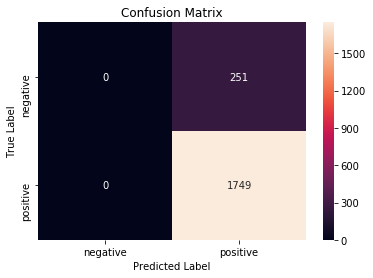

Wall time: 4.62 s


In [38]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C=0.01,gamma=0.0001,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(tfidf_svm_train,y_train)
pred = clf.predict(tfidf_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### RandomSearch CV for tuning parameters

In [40]:
tuning(y_train,y_test,tfidf_svm_train,tfidf_svm_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   43.2s finished


Best HyperParameter:  {'gamma': 0.5, 'C': 7}
Accuracy Obtained: 84.99%


Accuracy on test set: 87.250%
Precision on test set: 0.882
Recall on test set: 0.987
F1-Score on test set: 0.931


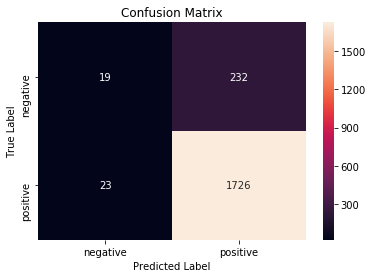

Wall time: 5.51 s


In [41]:
%%time
lb = LabelBinarizer() 
y_train = np.array([number[0] for number in lb.fit_transform(y_train)]) 
y_test= np.array([number[0] for number in lb.fit_transform(y_test)])
clf = SVC( C=7,gamma=0.5,class_weight='balanced') # Using the best parameters obtained by grid search
clf.fit(tfidf_svm_train,y_train)
pred = clf.predict(tfidf_svm_test)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, pred)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, pred)))
print("Recall on test set: %0.3f"%(recall_score(y_test, pred)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, pred)))

cm = confusion_matrix(y_test, pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model Name","Searching Method", "Hyper Parameter(C)", "Hyper Parameter(Gamma)","Accuracy"]


In [44]:
x.add_row(["SVM RBF on BoW",'Grid Search',20,0.001,91.400])
x.add_row(["SVM RBF on BoW",'Random Search',3,0.005,90.117])
x.add_row(["SVM RBF on TfIdf","Grid Search",0.5,0.0005,87.450])
x.add_row(["SVM RBF on TfIdf","Grid Search",0.5,0.001,87.450])
x.add_row(["SVM RBF on Avg-W2V","Random Search",15,0.1,85.050])
x.add_row(["SVM RBF on Avg-W2V","Grid Search",0.01,0.0001,87.450])
x.add_row(["SVM RBF on TfIdf-W2V","Random Search",7,0.5,87.250])
x.add_row(["SVM RBF on TfIdf-W2V","Random Search",0.01,0.0001,87.450])

print(x)


+----------------------+------------------+--------------------+------------------------+----------+
|      Model Name      | Searching Method | Hyper Parameter(C) | Hyper Parameter(Gamma) | Accuracy |
+----------------------+------------------+--------------------+------------------------+----------+
|    SVM RBF on BoW    |   Grid Search    |         20         |         0.001          |   91.4   |
|    SVM RBF on BoW    |  Random Search   |         3          |         0.005          |  90.117  |
|   SVM RBF on TfIdf   |   Grid Search    |        0.5         |         0.0005         |  87.45   |
|   SVM RBF on TfIdf   |   Grid Search    |        0.5         |         0.001          |  87.45   |
|  SVM RBF on Avg-W2V  |  Random Search   |         15         |          0.1           |  85.05   |
|  SVM RBF on Avg-W2V  |   Grid Search    |        0.01        |         0.0001         |  87.45   |
| SVM RBF on TfIdf-W2V |  Random Search   |         7          |          0.5           |  